<a href="https://colab.research.google.com/github/JonyeokLEE/python_COLAB/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch

x = torch.ones(2,2,requires_grad = True)
y = x + 1
z = 2*y**2
r = z.mean()

print("Result: ",r)


# requires_grad = True: 해당 Tensor를 기준으로 모든 연산을 추적하여 Gradient라고 하는 미분값의 모임(배열)을 계산할 수 있게 한다.
# 즉, x에 대하여 미분이 가능하다는 뜻이다.

# 그 후 합성 함수의 개념으로써 최종 함수 r은 x에 대해서 표현 및 미분이 가능하다.

# y와 z는 일련의 계산과정이기 때문에, 이들을 x에 대해서 미분을 하려고 하면 오류가 난다.

Result:  tensor(8., grad_fn=<MeanBackward0>)


In [47]:
print(x)
print(x.grad)
r.backward() # r을 기준으로 역전파를 진행. dr/dx = x + 1를 계산한다.
print(x.grad) # x + 1

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None
tensor([[2., 2.],
        [2., 2.]])


In [48]:
#선형회귀식

import torch
from matplotlib import pyplot as plt

x = torch.FloatTensor(range(5)).unsqueeze(1) #.unsqueeze를 통해 행렬 계산을 위한 2차원 배열 만들기 가능
y = 2*x + torch.rand(5,1) #실제 값으로 임의의 5개를 만들어준다.
#일변수 데이터를 생성, 즉 (x,y)인 형태로 2차원 상에서 표현이 가능
num_features = x.shape[1] #변수의 개수(5)를 저장한 변수

In [49]:
x

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])

In [50]:
w = torch.randn(num_features,1,requires_grad=True)
b = torch.randn(1,requires_grad=True)

선형식은 y = wx + b로 표현된다.
따라서 w는 5x1 데이터와 곱할 수 있어야 하며, 예측값이 하나만 나와야 하므로 1x1인 배열

따라서 xw는 5x1이 됨.

편향 b는 모든 인스턴스에 동일한 숫자를 더해주는 것이므로 크기가 1인 텐서로 정의

x랑 y는 변하지 않는 값으로써 업데이트가 필요하지 않기 때문에 require_grad = True가 없고, 반대로 w랑 b는 있다.

In [51]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b],lr=learning_rate)
#torch.optim.SGD 내부에 변수를 리스트로 묶어 넣어주고 적절한 Learning rate를 정하여 자동으로 가중치와 편향을 업데이트

In [52]:
loss_stack = [] # 매 epoch 마다 손실 함수값을 저장하기 위한 스택 생성

for epoch in range(1001): # 학습 반복 수를 1001로

  optimizer.zero_grad() # 최적화는 계산을 누적시키기 때문에 매 epoch마다 누적된 값을 optimizer.zero_grad()을 통해 초기화한다.
  y_hat = torch.matmul(x,w)+b # 회귀식 모델을 이용하여 예측값을 산출한다.
  loss = torch.mean((y_hat-y)**2) # 예측값과 실제값을 이용하여 손실 함수를 계산한다. (MSE 함수 이용)
  loss.backward() # 역전파 기준을 손실 함수로 정한다.
  optimizer.step() # 미리 정의한 optimizer를 이용하여 최적화를 시행한다.
  loss_stack.append(loss.item()) #그래프를 그리기 위해 손실 함수값만 loss_stack에 Push

  if epoch % 100 == 0: # 100 단위로 손실 함수값을 출력
    print(f'Epoch {epoch}:{loss.item()}')


Epoch 0:68.24112701416016
Epoch 100:4.702758312225342
Epoch 200:0.41826382279396057
Epoch 300:0.12194371223449707
Epoch 400:0.09488898515701294
Epoch 500:0.0867534801363945
Epoch 600:0.08060188591480255
Epoch 700:0.0752146765589714
Epoch 800:0.07043859362602234
Epoch 900:0.06620053946971893
Epoch 1000:0.06243940442800522


In [53]:
with torch.no_grad():
  y_hat = torch.matmul(x,w)+b
# 최종 학습된 w, b로 예측값을 산출
# 이때 최적화를 사용하지 않으므로 requires_grad를 비활성화한다.
# with torch.no_grad(): 를 이용해서 비활성화 가능

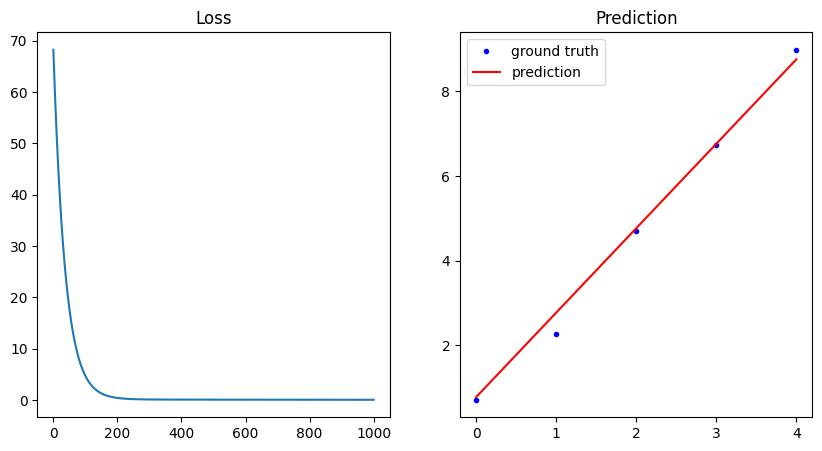

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()